In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
import pandas as pd
df = pd.read_csv('data/acidentes2021.csv',sep=';', encoding='latin-1')

df['data_inversa'] = pd.to_datetime(df['data_inversa'])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70936 entries, 0 to 70935
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      70936 non-null  int64         
 1   pesid                   70935 non-null  float64       
 2   data_inversa            70936 non-null  datetime64[ns]
 3   dia_semana              70936 non-null  object        
 4   horario                 70936 non-null  object        
 5   uf                      70936 non-null  object        
 6   br                      70739 non-null  float64       
 7   km                      70739 non-null  object        
 8   municipio               70936 non-null  object        
 9   causa_acidente          70936 non-null  object        
 10  tipo_acidente           70936 non-null  object        
 11  classificacao_acidente  70936 non-null  object        
 12  fase_dia                70936 non-null  object

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331730,738258.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,...,Masculino,0,1,0,0,"-24,56168114","-47,86752174",SR-SP,UOP01,DEL05
1,331804,738412.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,...,Masculino,1,0,0,0,"-2,508068","-60,036434",SR-AM,UOP01,DEL01
2,331815,738692.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Feminino,0,1,0,0,"-3,707626","-39,623509",SR-CE,UOP03,DEL04
3,331815,738689.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Masculino,0,1,0,0,"-3,707626","-39,623509",SR-CE,UOP03,DEL04
4,331823,740272.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,...,Masculino,1,0,0,0,"-22,6687122","-43,01862696",SR-RJ,UOP04,DEL02


In [3]:
import sqlite3

try:
    df = pd.read_csv('data/acidentes2021.csv',sep=';',encoding='latin-1')
    print("dados carregados com sucesso!")
except FileNotFoundError:
    print("Arquivo não encontrado, verifique se o arquivo está na pasta correta")

df['data_inversa'] = pd.to_datetime(df['data_inversa'])

df.head()

dados carregados com sucesso!


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331730,738258.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,...,Masculino,0,1,0,0,"-24,56168114","-47,86752174",SR-SP,UOP01,DEL05
1,331804,738412.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,...,Masculino,1,0,0,0,"-2,508068","-60,036434",SR-AM,UOP01,DEL01
2,331815,738692.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Feminino,0,1,0,0,"-3,707626","-39,623509",SR-CE,UOP03,DEL04
3,331815,738689.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Masculino,0,1,0,0,"-3,707626","-39,623509",SR-CE,UOP03,DEL04
4,331823,740272.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,...,Masculino,1,0,0,0,"-22,6687122","-43,01862696",SR-RJ,UOP04,DEL02


In [4]:
conn = sqlite3.connect('database_prf.db')

df.to_sql('transito', conn, if_exists='replace', index='false')

print('Tabela "transito"criada com sucesso no banco database_prf.db')

Tabela "transito"criada com sucesso no banco database_prf.db


In [5]:
query = """
SELECT br, COUNT(*) as total_acidentes
FROM transito
GROUP BY br
ORDER BY total_acidentes DESC
LIMIT 10
"""

top_rodovias = pd.read_sql_query(query, conn)
print(top_rodovias)

      br  total_acidentes
0  101.0            12538
1  116.0            10314
2   40.0             3398
3  381.0             3047
4  153.0             2674
5  163.0             2402
6  364.0             2315
7  277.0             1977
8  376.0             1844
9  262.0             1781


In [6]:
# criando uma tabela para as condições climaticas

query_clima = """
CREATE TABLE dim_clima AS
SELECT DISTINCT condicao_metereologica
FROM transito;
"""

conn.execute("DROP TABLE IF EXISTS dim_clima")
conn.execute(query_clima)

print("Tabela dim_clima criada com sucesso")

Tabela dim_clima criada com sucesso


In [7]:
cursor = conn.cursor()
cursor.execute("""
CREATE VIEW IF NOT EXISTS vw_resumo_acidentes AS
SELECT
    t.id, t.data_inversa, t.br, t.municipio, t.causa_acidente, c.condicao_metereologica
FROM transito AS t
LEFT JOIN dim_clima AS c
ON t.condicao_metereologica = c.condicao_metereologica
"""
)
print("View criada com sucesso")

View criada com sucesso


C:\Users\User\AppData\Local\Temp\ipykernel_1808\1326238673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_causas,x='total',y='causa_acidente', palette='viridis')


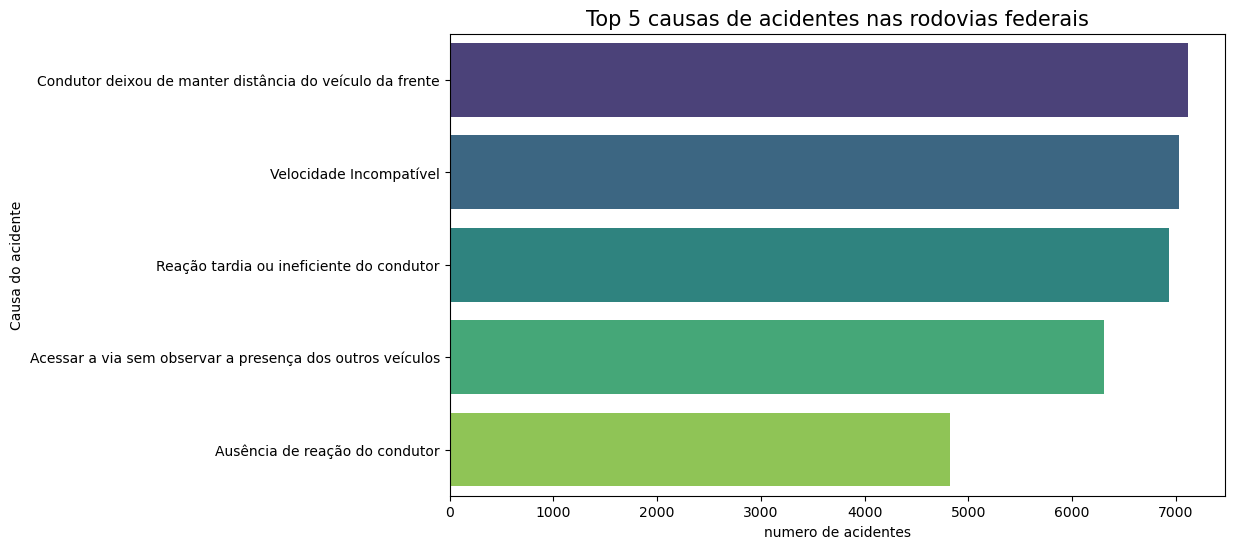

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

query = "SELECT causa_acidente, COUNT(*) as total FROM vw_resumo_acidentes GROUP BY causa_acidente ORDER BY total DESC LIMIT 5"
df_causas = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df_causas,x='total',y='causa_acidente', palette='viridis')

plt.title('Top 5 causas de acidentes nas rodovias federais', fontsize=15)
plt.xlabel('numero de acidentes')
plt.ylabel('Causa do acidente')

plt.show()

In [22]:
cursor = conn.cursor()
cursor.execute("DROP VIEW IF EXISTS vw_resumo_acidentes")
cursor.execute("""
CREATE VIEW vw_resumo_acidentes AS
SELECT
    t.id, t.br, t.uf, UPPER(t.causa_acidente) AS causa_limpa, t.classificacao_acidente, c.condicao_metereologica
FROM transito t
LEFT JOIN dim_clima c
ON t.condicao_metereologica = c.condicao_metereologica
""")
print("View criada com sucesso")

display(df_causas)

View criada com sucesso


,causa_acidente,total
0,Condutor deixou de manter distância do veículo...,7113
1,Velocidade Incompatível,7026
2,Reação tardia ou ineficiente do condutor,6933
3,Acessar a via sem observar a presença dos outr...,6310
4,Ausência de reação do condutor,4821


In [21]:
df_view = pd.read_sql("SELECT * FROM vw_resumo_acidentes LIMIT 10", conn)
display(df_view)

,id,br,uf,causa_limpa,classificacao_acidente,condicao_metereologica
0,331730,116.0,SP,REAçãO TARDIA OU INEFICIENTE DO CONDUTOR,Com Vítimas Feridas,Nublado
1,331804,174.0,AM,REAçãO TARDIA OU INEFICIENTE DO CONDUTOR,Com Vítimas Feridas,Céu Claro
2,331815,222.0,CE,VELOCIDADE INCOMPATíVEL,Com Vítimas Feridas,Céu Claro
3,331815,222.0,CE,VELOCIDADE INCOMPATíVEL,Com Vítimas Feridas,Céu Claro
4,331823,493.0,RJ,INGESTãO DE áLCOOL E/OU SUBSTâNCIAS PSICOATIVA...,Com Vítimas Feridas,Nublado
5,331843,393.0,RJ,CONDUTOR DORMINDO,Com Vítimas Feridas,Nublado
6,331844,101.0,BA,VELOCIDADE INCOMPATíVEL,Com Vítimas Feridas,Céu Claro
7,331855,277.0,PR,PISTA ESCORREGADIA,Com Vítimas Feridas,Garoa/Chuvisco
8,331857,20.0,GO,DEMAIS FALHAS MECâNICAS OU ELéTRICAS,Sem Vítimas,Céu Claro
9,331864,470.0,SC,TRANSITAR NA CONTRAMãO,Com Vítimas Fatais,Nublado


In [11]:
query_gravida_clima = """
SELECT
    condicao_metereologica,
    classificacao_acidente,
    COUNT (*) AS quantidade
FROM vw_resumo_acidentes
WHERE condicao_metereologica IS NOT NULL
GROUP BY condicao_metereologica, classificacao_acidente
ORDER BY quantidade DESC
"""
df_clima_gravidade = pd.read_sql(query_gravida_clima,conn)
display(df_clima_gravidade)

,condicao_metereologica,classificacao_acidente,quantidade
0,Céu Claro,Com Vítimas Feridas,32193
1,Nublado,Com Vítimas Feridas,9428
2,Céu Claro,Sem Vítimas,6238
3,Chuva,Com Vítimas Feridas,5536
4,Sol,Com Vítimas Feridas,4074
5,Céu Claro,Com Vítimas Fatais,3789
6,Garoa/Chuvisco,Com Vítimas Feridas,1845
7,Nublado,Sem Vítimas,1767
8,Nublado,Com Vítimas Fatais,1160
9,Chuva,Sem Vítimas,1070


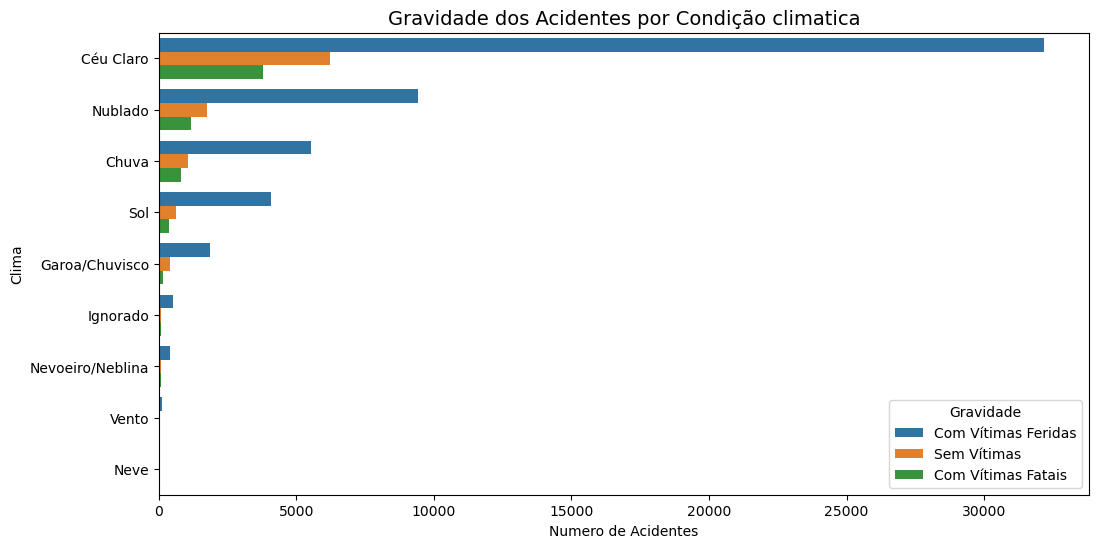

In [12]:
plt.figure(figsize=(12,6))

sns.barplot(data=df_clima_gravidade,x='quantidade',y='condicao_metereologica',hue='classificacao_acidente')

plt.title('Gravidade dos Acidentes por Condição climatica', fontsize=14)
plt.xlabel('Numero de Acidentes')
plt.ylabel('Clima')
plt.legend(title='Gravidade', loc='lower right')

plt.show()

In [13]:
query_proporcao = """
SELECT
    condicao_metereologica,
    COUNT (*) AS total_acidentes,
    SUM(CASE WHEN classificacao_acidente IN ('Com Vítimas Fatais', 'Com Vítimas Feridas') THEN 1 ELSE 0 END) AS acidentes_com_vitimas
FROM vw_resumo_acidentes
WHERE condicao_metereologica IS NOT NULL AND condicao_metereologica != 'Ignorado'
GROUP BY condicao_metereologica
HAVING total_acidentes > 100
"""

df_proporcao = pd.read_sql(query_proporcao,conn)

#calculando a taxa de letalidade

df_proporcao['taxa_de_gravidade'] = df_proporcao['acidentes_com_vitimas'] / df_proporcao['total_acidentes'] * 100
df_proporcao = df_proporcao.sort_values('taxa_de_gravidade', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_1808\3646163910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_proporcao, x='taxa_de_gravidade', y='condicao_metereologica', palette='Reds_r')


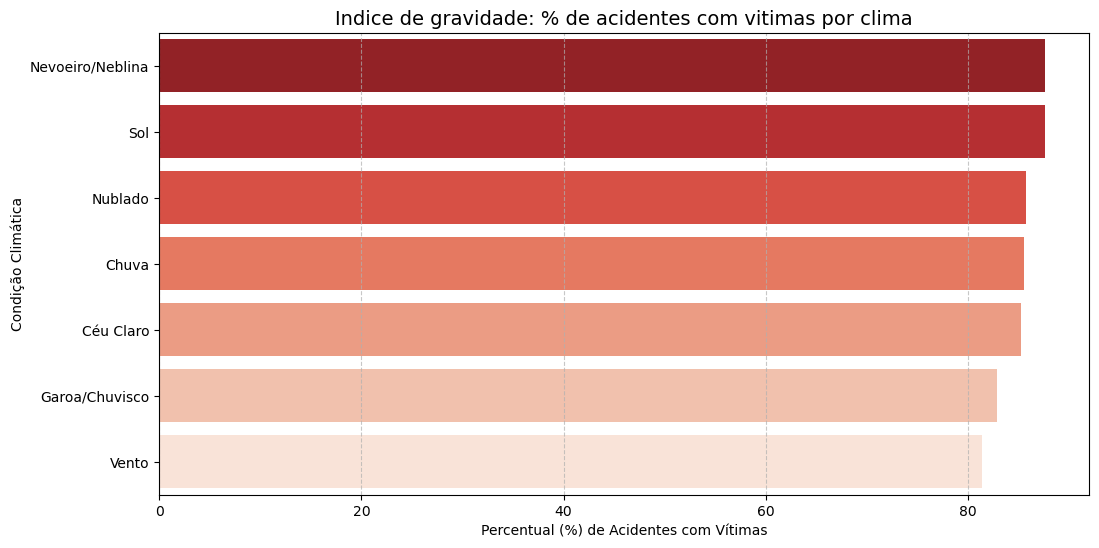

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_proporcao, x='taxa_de_gravidade', y='condicao_metereologica', palette='Reds_r')

plt.title('Indice de gravidade: % de acidentes com vitimas por clima', fontsize=14)
plt.xlabel('Percentual (%) de Acidentes com Vítimas')
plt.ylabel('Condição Climática')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1808\2772717706.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='taxa_de_gravidade', y='condicao_metereologica', palette='magma')


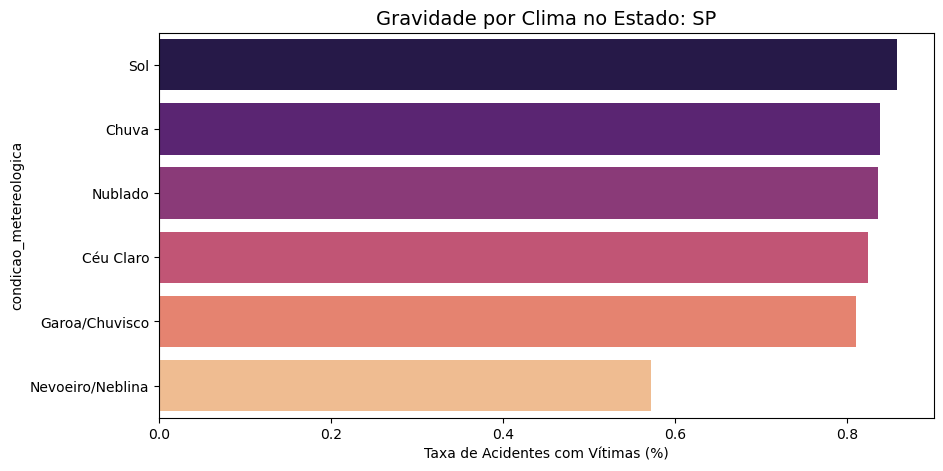

,condicao_metereologica,total_acidentes,acidentes_com_vitimas,taxa_de_gravidade
5,Sol,309,265,0.857605
0,Chuva,449,376,0.837416
4,Nublado,967,808,0.835574
1,Céu Claro,2428,2001,0.824135
2,Garoa/Chuvisco,247,200,0.809717
3,Nevoeiro/Neblina,35,20,0.571429


Relatório salvo com sucesso em: relatorios/analise_SP.csv


In [15]:
def analisar_clima_estado(sigla_uf, conexao):
    sigla_uf = sigla_uf.upper()

    query = f"""
    SELECT
        condicao_metereologica,
        COUNT(*) as total_acidentes,
        SUM(CASE WHEN classificacao_acidente IN ('Com Vítimas Fatais', 'Com Vítimas Feridas') THEN 1 ELSE 0 END) as acidentes_com_vitimas
    FROM vw_resumo_acidentes
    WHERE uf = '{sigla_uf}'
        AND condicao_metereologica NOT IN ('Ignorado', 'Não Informado')
    GROUP BY condicao_metereologica
    HAVING total_acidentes > 10 
    """
    
    df = pd.read_sql(query,conexao)

    if df.empty:
        print(f"Sem dados suficientes para: {sigla_uf}")
        return

    df['taxa_de_gravidade'] = (df['acidentes_com_vitimas'] / df['total_acidentes'])
    df = df.sort_values('taxa_de_gravidade', ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x='taxa_de_gravidade', y='condicao_metereologica', palette='magma')
    plt.title(f'Gravidade por Clima no Estado: {sigla_uf}', fontsize=14)
    plt.xlabel('Taxa de Acidentes com Vítimas (%)')
    plt.show()
    display(df)

    import os
    if not os.path.exists('relatorios'):
        os.makedirs('relatorios')

    caminho_arquivo = f'relatorios/analise_{sigla_uf}.csv'
    df.to_csv(caminho_arquivo,sep=',', index=False, encoding='utf-8-sig')

    print(f"Relatório salvo com sucesso em: {caminho_arquivo}")
          
analisar_clima_estado('SP',conn)

C:\Users\User\AppData\Local\Temp\ipykernel_1808\2772717706.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='taxa_de_gravidade', y='condicao_metereologica', palette='magma')


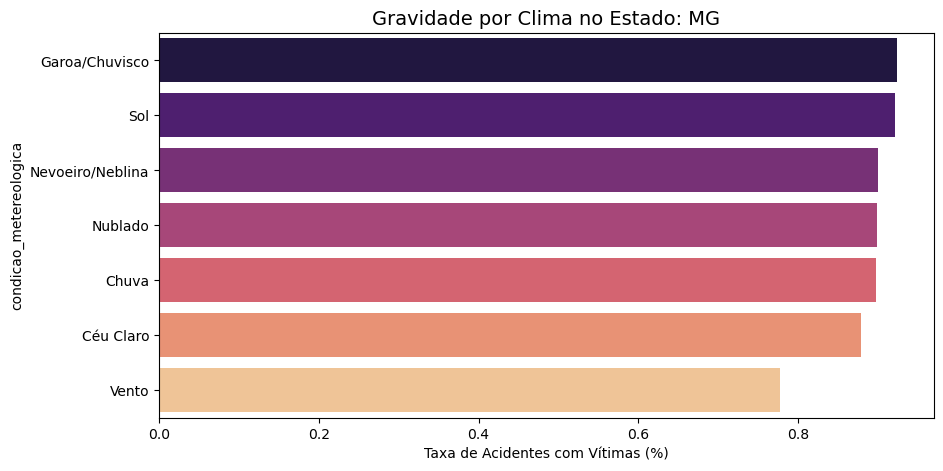

,condicao_metereologica,total_acidentes,acidentes_com_vitimas,taxa_de_gravidade
2,Garoa/Chuvisco,144,133,0.923611
5,Sol,799,736,0.921151
3,Nevoeiro/Neblina,60,54,0.900000
4,Nublado,1435,1289,0.898258
0,Chuva,1075,964,0.896744
1,Céu Claro,5147,4520,0.878181
6,Vento,27,21,0.777778


Relatório salvo com sucesso em: relatorios/analise_MG.csv


In [16]:
analisar_clima_estado('MG',conn)

In [19]:
query = "SELECT causa_acidente, COUNT(*) as total FROM vw_resumo_acidentes GROUP BY causa_acidente ORDER BY total DESC LIMIT 5"
df_causas = pd.read_sql(query, conn)

display(df_causas)

DatabaseError: Execution failed on sql 'SELECT causa_acidente, COUNT(*) as total FROM vw_resumo_acidentes GROUP BY causa_acidente ORDER BY total DESC LIMIT 5': no such column: causa_acidente